In [1310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

In [1311]:
kospi1 = pd.read_csv("./데이터/코스피전체연결찐.csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./데이터/코스피전체개별찐.csv", encoding = "euc-kr")

In [1312]:
kospi1.columns

Index(['회사명', '거래소코드', '회계년도', '종가', 'PER(최고)(IFRS)', 'PER(최저)(IFRS)',
       'PBR(최고)(IFRS)', 'PBR(최저)(IFRS)', 'PCR(최고)(IFRS)', 'PCR(최저)(IFRS)',
       'PSR(최고)(IFRS)', 'PSR(최저)(IFRS)', 'EV/EBITDA(IFRS)', '자기자본순이익률(IFRS연결)',
       '자산(*)(IFRS연결)', '당기순이익(손실)(IFRS연결)', '판매비와 관리비(물류원가 등 포함)(*)(IFRS연결)',
       '연구개발비(IFRS연결)', '매출액(수익)(*)(IFRS연결)', '* (정상)영업손익(보고서기재)(IFRS연결)'],
      dtype='object')

In [1313]:
# st13 = pd.read_csv("./데이터/코스피주식(2013).csv", encoding = "euc-kr")
st14 = pd.read_csv("./데이터/코스피주식(2014).csv", encoding = "euc-kr")
st15 = pd.read_csv("./데이터/코스피주식(2015).csv", encoding = "euc-kr")
st16 = pd.read_csv("./데이터/코스피주식(2016).csv", encoding = "euc-kr")
st17 = pd.read_csv("./데이터/코스피주식(2017).csv", encoding = "euc-kr")
st18 = pd.read_csv("./데이터/코스피주식(2018).csv", encoding = "euc-kr")
st19 = pd.read_csv("./데이터/코스피주식(2019).csv", encoding = "euc-kr")
# st20 = pd.read_csv("./데이터/코스피주식(2020).csv", encoding = "euc-kr")
# st21 = pd.read_csv("./데이터/코스피주식(2021).csv", encoding = "euc-kr")
# st22 = pd.read_csv("./데이터/코스피주식(2022).csv", encoding = "euc-kr")

In [1314]:
kospi1.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']
kospi2.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']

In [1315]:
# st13['회계년도'] = '2013/12'
st14['회계년도'] = '2014/12'
st15['회계년도'] = '2015/12'
st16['회계년도'] = '2016/12'
st17['회계년도'] = '2017/12'
st18['회계년도'] = '2018/12'
st19['회계년도'] = '2019/12'
# st20['회계년도'] = '2020/12'
# st21['회계년도'] = '2021/12'
# st22['회계년도'] = '2022/12'


In [1316]:
df = pd.concat([st14, st15, st16, st17, st18, st19], axis=0)

In [1317]:
kospi = kospi1.fillna(kospi2)

In [1318]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,매출액,영업이익
0,(주)DB하이텍,990,2014/12,4615.0,0.00,0.00,5.25,2.02,8.22,3.17,0.69,0.26,6.50,-47.32,9.848766e+08,-77008844.0,91344601.0,41769000.0,567718224.0,45560248.0
1,(주)DB하이텍,990,2015/12,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,1.29,0.28,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,666594987.0,124968815.0
2,(주)DB하이텍,990,2016/12,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,1.21,0.67,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,773140180.0,172427930.0
3,(주)DB하이텍,990,2017/12,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,679737744.0,143195168.0
4,(주)DB하이텍,990,2018/12,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,1.38,0.67,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,669279136.0,112993143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,흥아해운(주),3280,2015/12,1895.0,40.31,15.11,2.22,0.83,10.45,3.92,0.44,0.17,11.71,6.18,7.916408e+08,10517216.0,31180960.0,0.0,845115359.0,21244278.0
4243,흥아해운(주),3280,2016/12,1330.0,0.00,0.00,1.48,0.62,0.00,0.00,0.34,0.14,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,831746081.0,5895873.0
4244,흥아해운(주),3280,2017/12,751.0,0.00,0.00,2.80,0.85,0.00,0.00,0.38,0.12,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,836427496.0,-13098624.0
4245,흥아해운(주),3280,2018/12,402.0,0.00,0.00,2.97,1.09,0.00,0.00,0.24,0.09,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,753865569.0,-37595967.0


In [1319]:
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)

In [1320]:
kospi['회사명'] = kospi['회사명'].str.replace('(주)', '')

In [1321]:
kospi = pd.merge(kospi, df[['종목코드', '회계년도', '상장주식수', '시가총액']], on=['종목코드', '회계년도'], how='left')

In [1322]:
# 컬럼 값의 뒤에서 "/12"를 제거하는 함수
def remove_suffix(value):
    if isinstance(value, str) and value.endswith("/12"):
        return value[:-3]  # 마지막 세 글자 제거
    else:
        return value

# 모든 컬럼에 함수 적용
kospi = kospi.applymap(remove_suffix)

In [1323]:
kospi = kospi.dropna()

In [1324]:
kospi["PER"] = (kospi["PER(최고)"] + kospi["PER(최저)"])/2
kospi["PBR"] = (kospi["PBR(최고)"] + kospi["PBR(최저)"])/2
kospi["PCR"] = (kospi["PCR(최고)"] + kospi["PCR(최저)"])/2
kospi["PSR"] = (kospi["PSR(최고)"] + kospi["PSR(최저)"])/2
kospi['PRR'] = kospi["시가총액"]/ kospi["연구개발비"]
kospi['RDS'] = kospi["연구개발비"]/ kospi["매출액"]
kospi['RDO'] = kospi["연구개발비"]/ kospi["영업이익"]
kospi['RDN'] = kospi["연구개발비"]/ kospi["당기순이익"]
kospi.drop(["PER(최고)", "PER(최저)", "PBR(최고)", "PBR(최저)", "PCR(최고)", "PCR(최저)", "PSR(최고)", "PSR(최저)"], axis=1, inplace=True)

In [1325]:
kospi.reset_index(drop=True, inplace=True)

In [1326]:
kospi["ROA"] = kospi["당기순이익"]/kospi["자산"]*100
kospi["판관비"] = kospi["판매관리비"]/kospi["시가총액"]*1000
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비
0,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-77008844.0,91344601.0,41769000.0,...,0.000,3.635,5.695,0.475,4.902141e+03,0.073573,0.916786,-0.542392,-7.819136,0.446111
1,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,4.105,2.150,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039
2,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,8.260,2.145,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677
3,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,10.395,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305
4,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,7.210,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,흥아해운,003280,2015,1895.0,11.71,6.18,7.916408e+08,10517216.0,31180960.0,0.0,...,27.710,1.525,7.185,0.305,inf,0.000000,0.000000,0.000000,1.328534,0.194235
3930,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,0.000,1.050,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440
3931,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,0.000,1.825,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706
3932,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291


In [1327]:
kospi["EY"] = 1/kospi["이익수익률"]
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY
0,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-77008844.0,91344601.0,41769000.0,...,3.635,5.695,0.475,4.902141e+03,0.073573,0.916786,-0.542392,-7.819136,0.446111,0.153846
1,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,2.150,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695
2,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,2.145,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305
3,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542
4,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,흥아해운,003280,2015,1895.0,11.71,6.18,7.916408e+08,10517216.0,31180960.0,0.0,...,1.525,7.185,0.305,inf,0.000000,0.000000,0.000000,1.328534,0.194235,0.085397
3930,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,1.050,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445
3931,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,1.825,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178
3932,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf


In [1328]:
# kospi.to_csv('./kospi(0530).csv', index=False)

In [1329]:
# kospi.loc[kospi["회계년도"] == "2013/12"].sort_values(by = ["PER"], ascending=False)

In [1330]:
# pbr_jan2013 = kospi.loc[kospi["회계년도"] == "2013/12"][kospi["거래월"] == 1.0].sort_values(by = ["pbr"], ascending=False)

In [1331]:
kospi['회계년도'] = kospi['회계년도'].astype(int)

In [1332]:
adjust_price = pd.read_csv("./adjust_price.csv")

In [1333]:
adjust_price

,Unnamed: 0,날짜,종목,종목코드,종가,수익률
0,0,2013-04-01,DB하이텍,990,6440.0,NaN
1,1,2014-04-01,DB하이텍,990,6640.0,0.031056
2,2,2015-04-01,DB하이텍,990,5880.0,-0.114458
3,3,2016-04-01,DB하이텍,990,18100.0,2.078231
4,4,2017-04-03,DB하이텍,990,20350.0,0.124309
...,...,...,...,...,...,...
7465,7465,2019-04-01,흥아해운,3280,3523.0,-0.564739
7466,7466,2020-04-01,흥아해운,3280,1555.0,-0.558615
7467,7467,2021-04-01,흥아해운,3280,1555.0,0.000000
7468,7468,2022-04-01,흥아해운,3280,2850.0,0.832797


In [1334]:
# 날짜를 년도로 변환
adjust_price['날짜'] = pd.to_datetime(adjust_price['날짜'])
adjust_price['년도'] = adjust_price['날짜'].dt.year
adjust_price = adjust_price[['년도', '종목', '종가', '수익률']]
adjust_price

,년도,종목,종가,수익률
0,2013,DB하이텍,6440.0,NaN
1,2014,DB하이텍,6640.0,0.031056
2,2015,DB하이텍,5880.0,-0.114458
3,2016,DB하이텍,18100.0,2.078231
4,2017,DB하이텍,20350.0,0.124309
...,...,...,...,...
7465,2019,흥아해운,3523.0,-0.564739
7466,2020,흥아해운,1555.0,-0.558615
7467,2021,흥아해운,1555.0,0.000000
7468,2022,흥아해운,2850.0,0.832797


In [1335]:
kospi = pd.merge(kospi, adjust_price[['년도', '종목', '종가']], left_on=['회계년도', '회사명'], right_on=['년도', '종목'], how='left')
kospi.drop(['년도', '종목'], axis=1, inplace=True)
kospi

,회사명,종목코드,회계년도,종가_x,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,종가_y
0,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-77008844.0,91344601.0,41769000.0,...,5.695,0.475,4.902141e+03,0.073573,0.916786,-0.542392,-7.819136,0.446111,0.153846,6640.0
1,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,126733352.0,104710656.0,49406000.0,...,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,88344018.0,117582311.0,53738000.0,...,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,흥아해운,003280,2015,1895.0,11.71,6.18,7.916408e+08,10517216.0,31180960.0,0.0,...,7.185,0.305,inf,0.000000,0.000000,0.000000,1.328534,0.194235,0.085397,40284.0
3930,흥아해운,003280,2016,1330.0,15.05,-9.40,9.585323e+08,-17173253.0,31480123.0,0.0,...,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445,15557.0
3931,흥아해운,003280,2017,751.0,41.36,-47.52,8.489585e+08,-73500411.0,30567940.0,0.0,...,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178,19460.0
3932,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf,8094.0


In [1336]:
kospi.columns

Index(['회사명', '종목코드', '회계년도', '종가_x', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비',
       '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR',
       'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '종가_y'],
      dtype='object')

In [1337]:
kospi.columns = ['회사명', '종목코드', '회계년도', '종가', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR', 'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '수정종가']

In [1338]:
kospi.drop(["이익수익률", "자산", "판매관리비", "당기순이익", '연구개발비', '매출액', '영업이익', '상장주식수'], axis=1, inplace=True)

In [1339]:
kospi['수익률'] = kospi.groupby('회사명')['수정종가'].pct_change() * 10

In [1340]:
kospi = kospi.dropna()

In [1341]:
kospi = kospi.reset_index(drop=True)

In [1342]:
# kospi.to_csv('./kospi(최종).csv', index=False)

In [1343]:
# kospi = pd.read_csv("./kospi(최종).csv")

In [1344]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2015,14300.0,67.63,6.344600e+11,4.105,2.150,3.480,0.785,1.284176e+04,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695,5880.0,-1.144578
1,DB하이텍,000990,2016,15900.0,29.65,7.054485e+11,8.260,2.145,2.945,0.940,1.312755e+04,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305,18100.0,20.782313
2,DB하이텍,000990,2017,12000.0,27.62,5.324140e+11,10.395,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0,1.243094
3,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
4,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,흥아해운,003280,2015,1895.0,6.18,1.605319e+11,27.710,1.525,7.185,0.305,inf,0.000000,0.000000,0.000000,1.328534,0.194235,0.085397,40284.0,18.941734
3191,흥아해운,003280,2016,1330.0,-9.40,1.366089e+11,0.000,1.050,0.000,0.240,inf,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445,15557.0,-6.138169
3192,흥아해운,003280,2017,751.0,-47.52,9.591279e+10,0.000,1.825,0.000,0.250,inf,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178,19460.0,2.508838
3193,흥아해운,003280,2018,402.0,-91.08,7.060866e+10,0.000,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf,8094.0,-5.840699


In [1345]:
kospi = kospi.replace([np.inf, -np.inf], 0)

In [1346]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2015,14300.0,67.63,6.344600e+11,4.105,2.150,3.480,0.785,12841.760062,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695,5880.0,-1.144578
1,DB하이텍,000990,2016,15900.0,29.65,7.054485e+11,8.260,2.145,2.945,0.940,13127.554595,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305,18100.0,20.782313
2,DB하이텍,000990,2017,12000.0,27.62,5.324140e+11,10.395,1.910,4.245,1.140,9781.986918,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0,1.243094
3,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9121.845859,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
4,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,22160.753559,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,흥아해운,003280,2015,1895.0,6.18,1.605319e+11,27.710,1.525,7.185,0.305,0.000000,0.000000,0.000000,0.000000,1.328534,0.194235,0.085397,40284.0,18.941734
3191,흥아해운,003280,2016,1330.0,-9.40,1.366089e+11,0.000,1.050,0.000,0.240,0.000000,0.000000,0.000000,-0.000000,-1.791620,0.230440,0.066445,15557.0,-6.138169
3192,흥아해운,003280,2017,751.0,-47.52,9.591279e+10,0.000,1.825,0.000,0.250,0.000000,0.000000,-0.000000,-0.000000,-8.657715,0.318706,0.024178,19460.0,2.508838
3193,흥아해운,003280,2018,402.0,-91.08,7.060866e+10,0.000,2.030,0.000,0.165,0.000000,0.000000,-0.000000,-0.000000,-10.767739,0.433291,0.000000,8094.0,-5.840699


In [1347]:
kospi = kospi.loc[~(kospi["PER"] == 0)]

In [1348]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2015,14300.0,67.63,6.344600e+11,4.105,2.150,3.480,0.785,12841.760062,0.074117,0.395347,0.389842,12.870986,0.165039,0.195695,5880.0,-1.144578
1,DB하이텍,000990,2016,15900.0,29.65,7.054485e+11,8.260,2.145,2.945,0.940,13127.554595,0.069506,0.311655,0.608281,8.952679,0.166677,0.246305,18100.0,20.782313
2,DB하이텍,000990,2017,12000.0,27.62,5.324140e+11,10.395,1.910,4.245,1.140,9781.986918,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0,1.243094
3,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9121.845859,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
4,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,22160.753559,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,효성아이티엑스,094280,2016,11700.0,14.12,1.352309e+11,25.820,3.830,13.650,0.495,374584.339752,0.001061,0.031976,0.049285,5.986196,0.120733,0.096993,13450.0,-1.514196
3187,효성아이티엑스,094280,2017,12600.0,16.48,1.456333e+11,21.435,3.940,43.280,0.490,98769.609522,0.003733,0.120713,0.154834,6.455622,0.137546,0.094251,13050.0,-0.297398
3188,효성아이티엑스,094280,2018,10400.0,13.65,1.202053e+11,18.495,4.560,7.025,0.385,54110.838618,0.005525,0.195954,0.295231,6.197322,0.193521,0.124688,12600.0,-0.344828
3189,효성아이티엑스,094280,2019,16700.0,21.77,1.930219e+11,12.745,4.160,9.320,0.425,77843.009706,0.006387,0.190357,0.228963,6.796626,0.127620,0.125313,10600.0,-1.587302


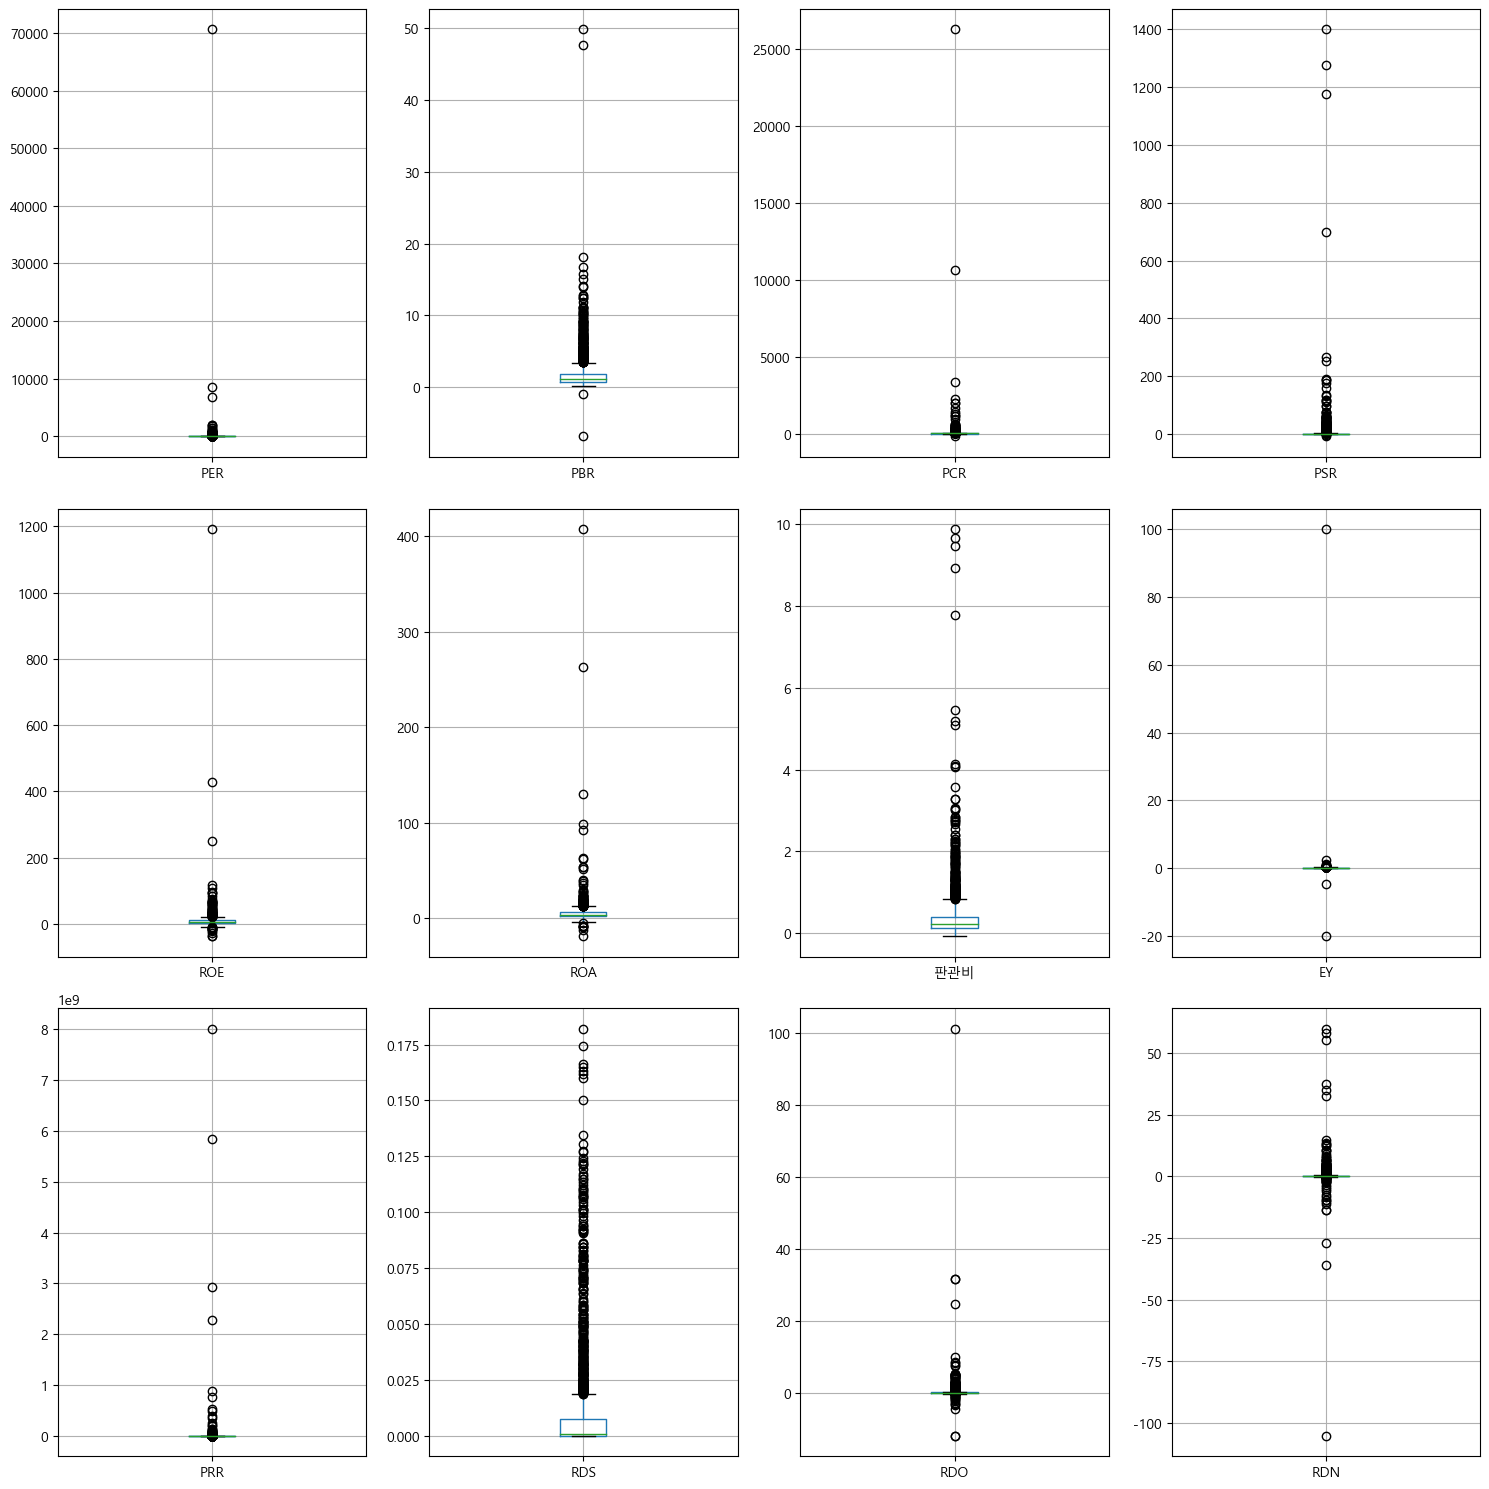

In [1349]:
## 윈저라이징 전 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY",'PRR', 'RDS', 'RDO', 'RDN']].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

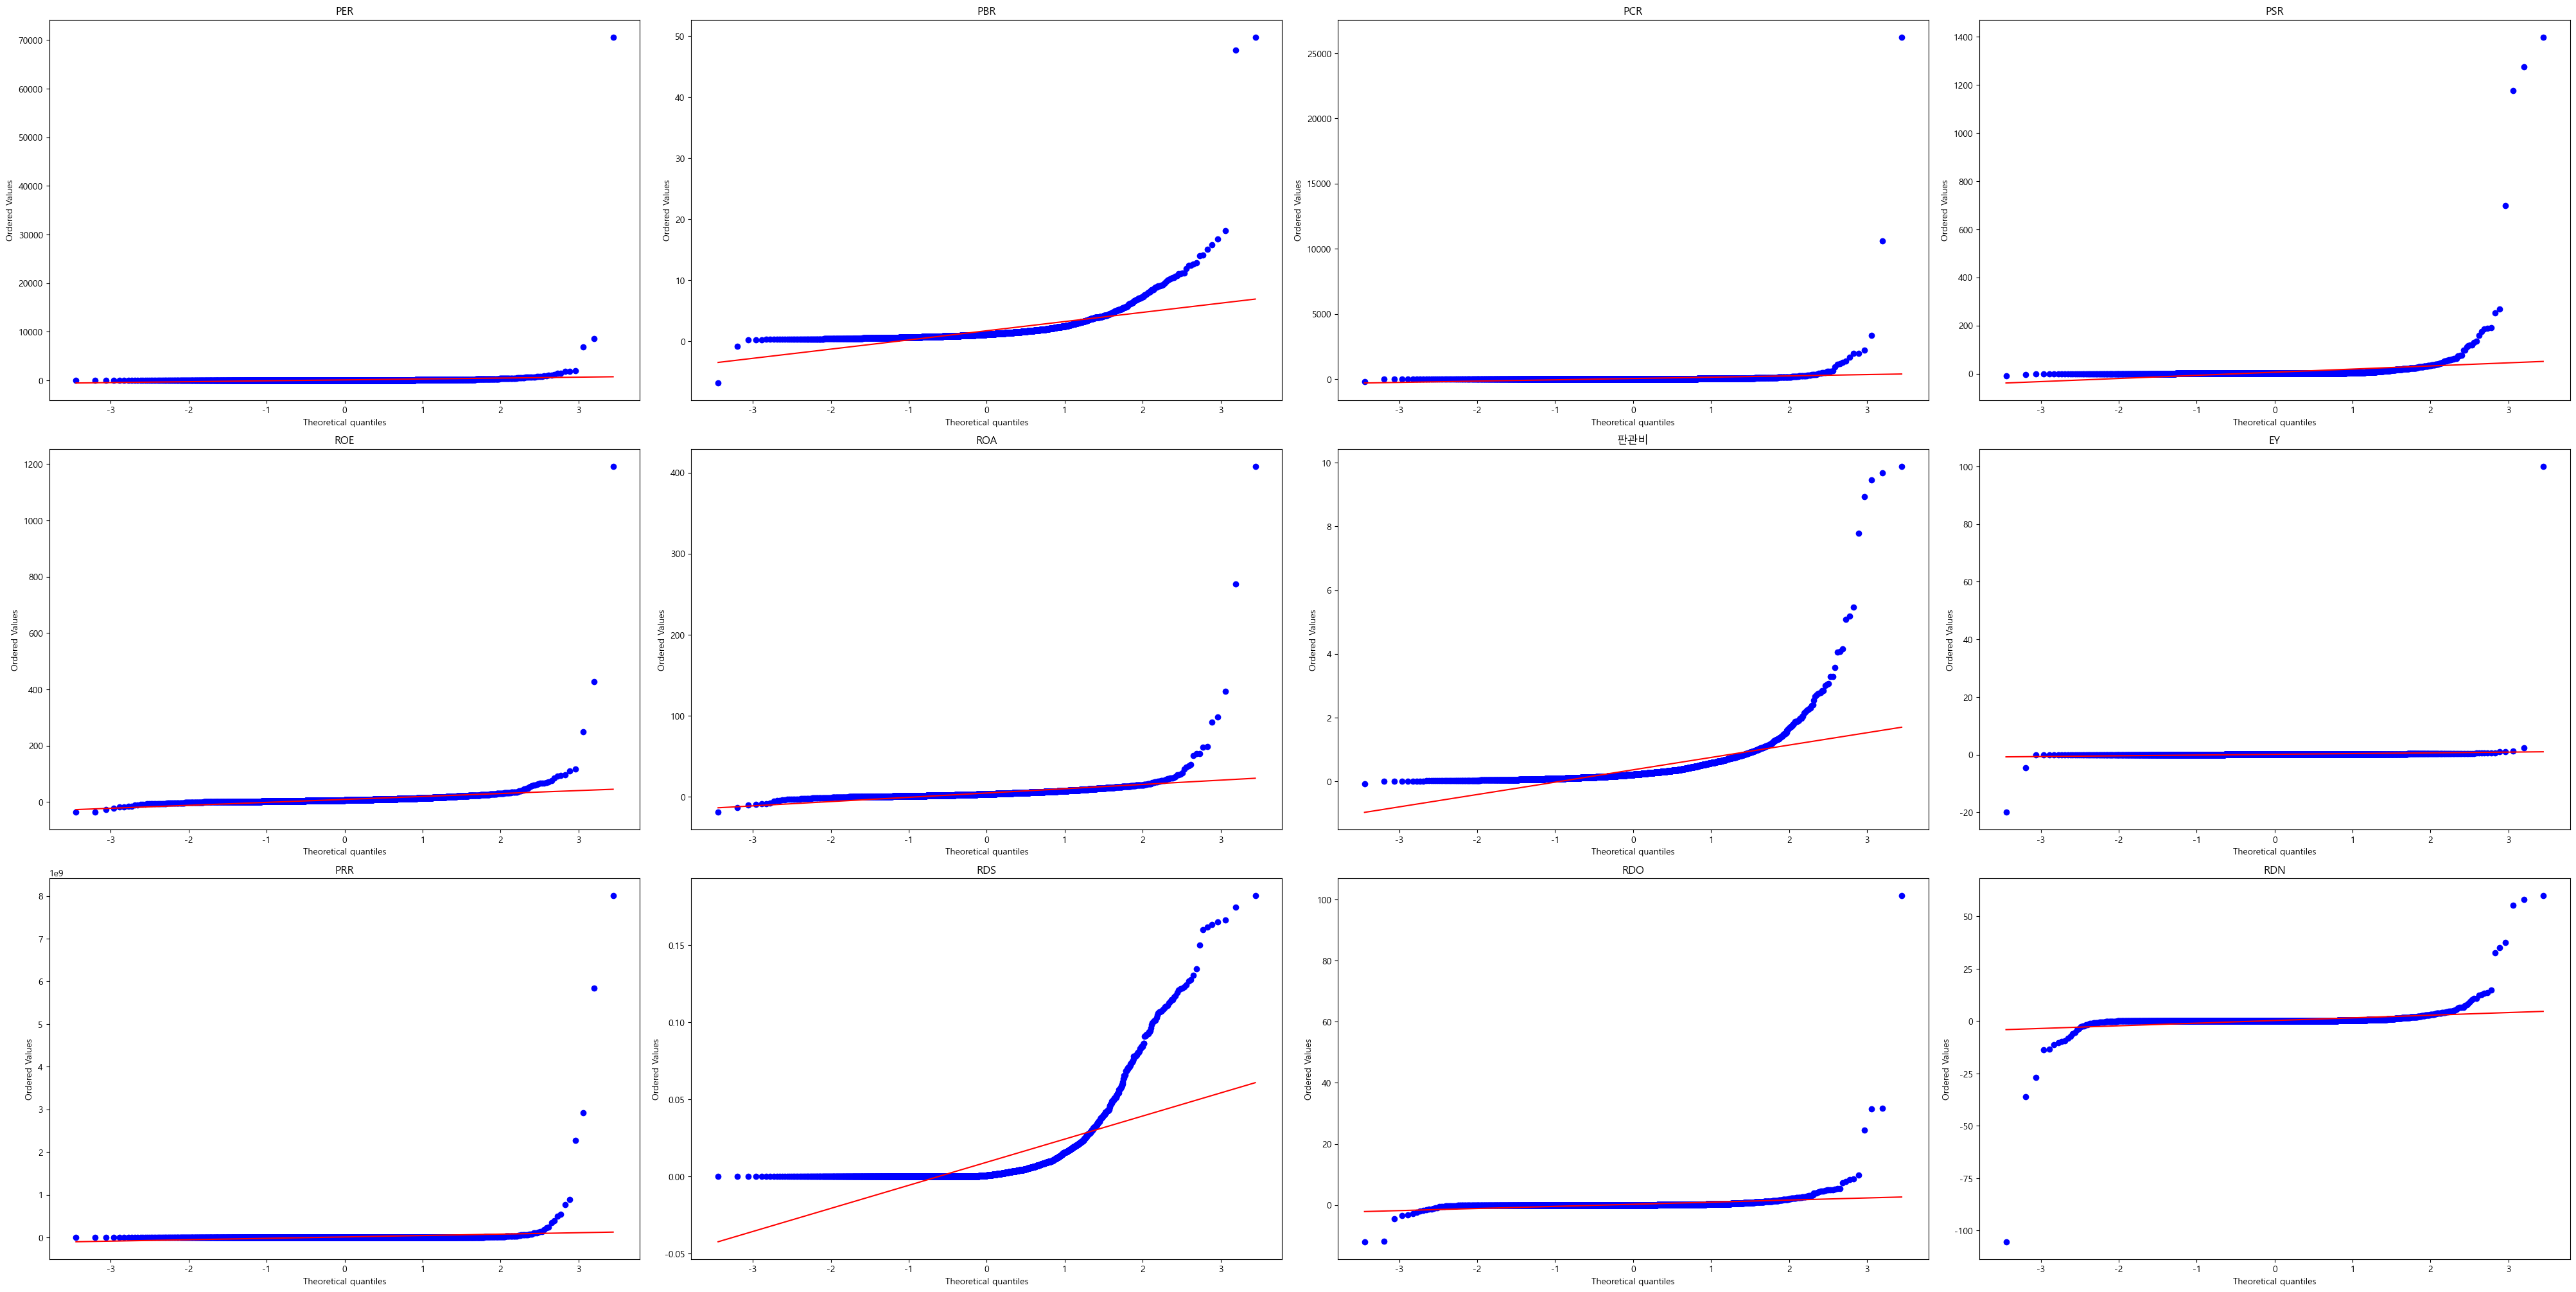

In [1350]:
# 윈저라이징 전 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']],4,3)

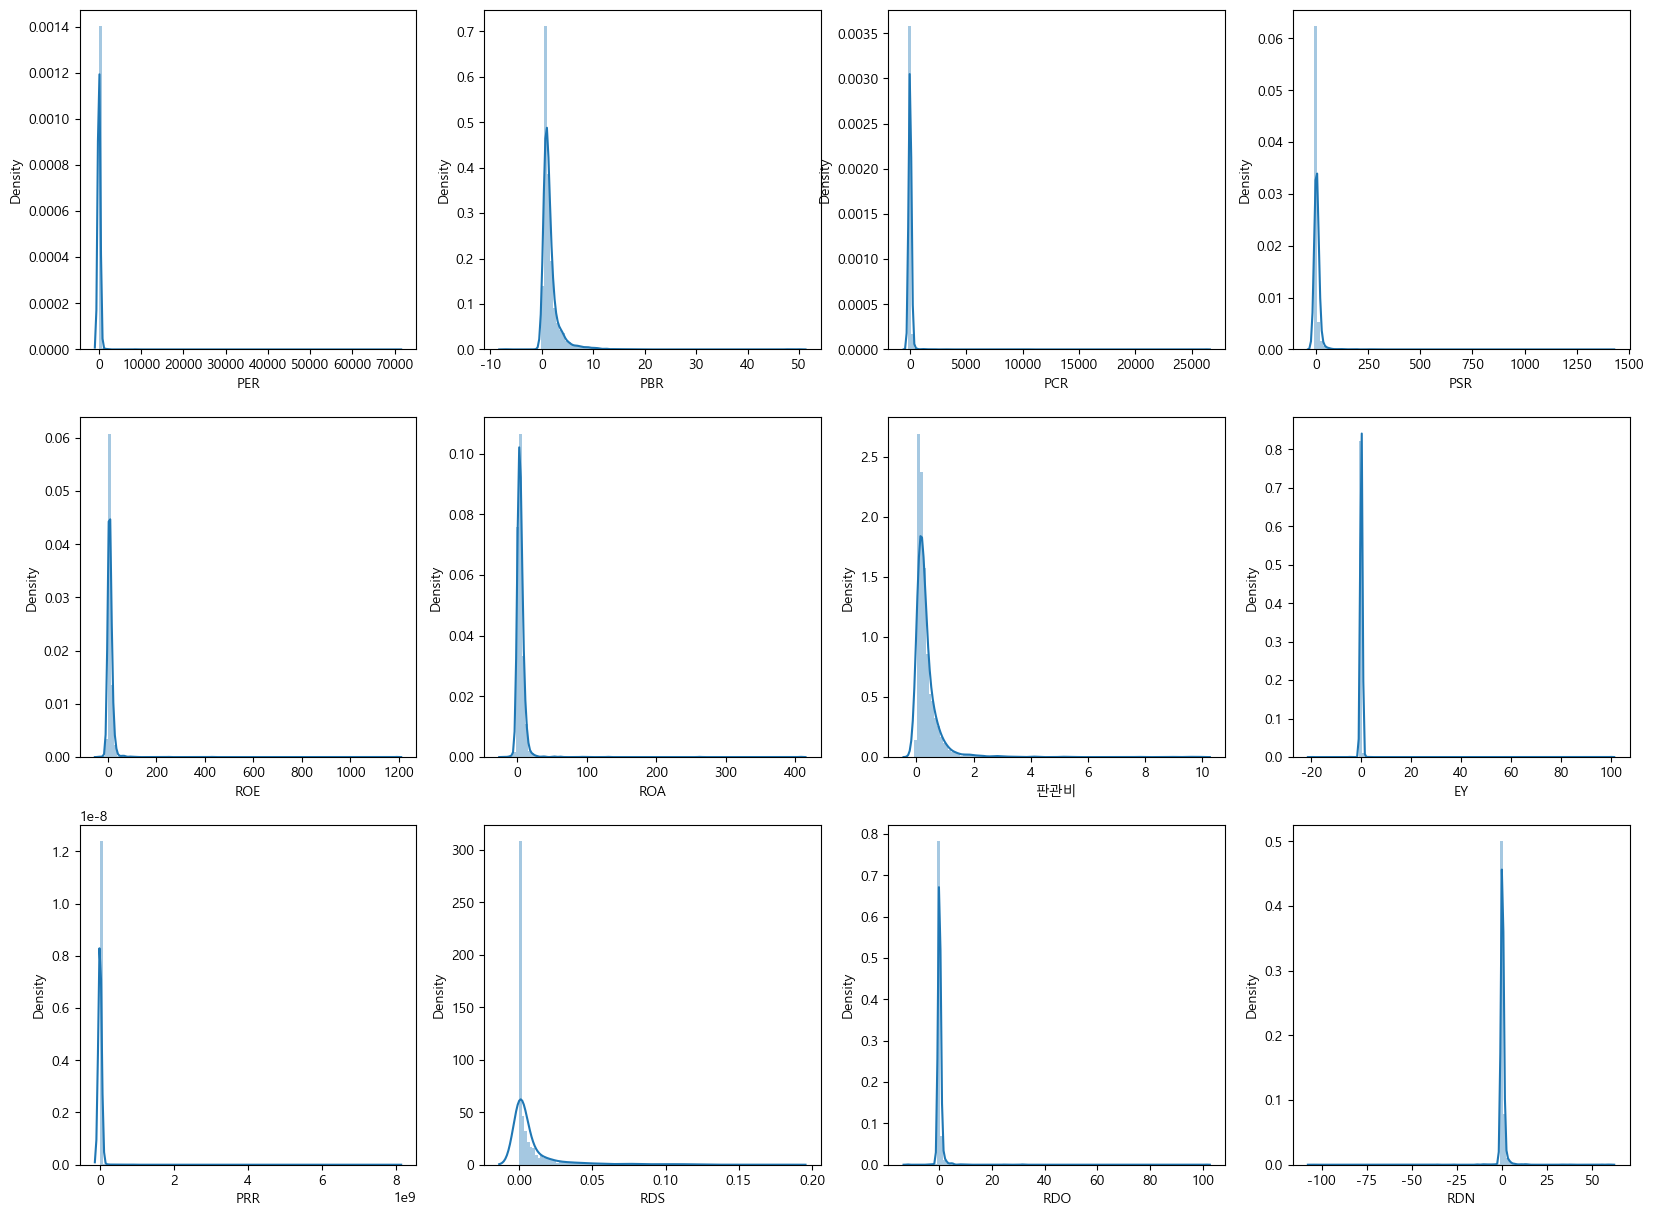

In [1351]:
# 윈저라이징 전 distplot

col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

# 윈저라이징

In [1352]:
kospi['PER'] = winsorize(kospi['PER'], limits= (0, 0.01))
kospi['PBR'] = winsorize(kospi['PBR'], limits= (0.001, 0.009))
kospi['PCR'] = winsorize(kospi['PCR'], limits= (0.001, 0.009))
kospi['PSR'] = winsorize(kospi['PSR'], limits= (0, 0.01))
kospi['ROE'] = winsorize(kospi['ROE'], limits= (0.001, 0.009))
kospi['ROA'] = winsorize(kospi['ROA'], limits= (0.001, 0.009))
kospi['판관비'] = winsorize(kospi['판관비'], limits= (0, 0.01))
kospi['EY'] = winsorize(kospi['EY'], limits= (0.002, 0.008))
kospi['PRR'] = winsorize(kospi['PRR'], limits= (0, 0.01))
kospi['RDS'] = winsorize(kospi['RDS'], limits= (0, 0.01))
kospi['RDO'] = winsorize(kospi['RDO'], limits= (0.002, 0.008))
kospi['RDN'] = winsorize(kospi['RDN'], limits= (0.005, 0.005))


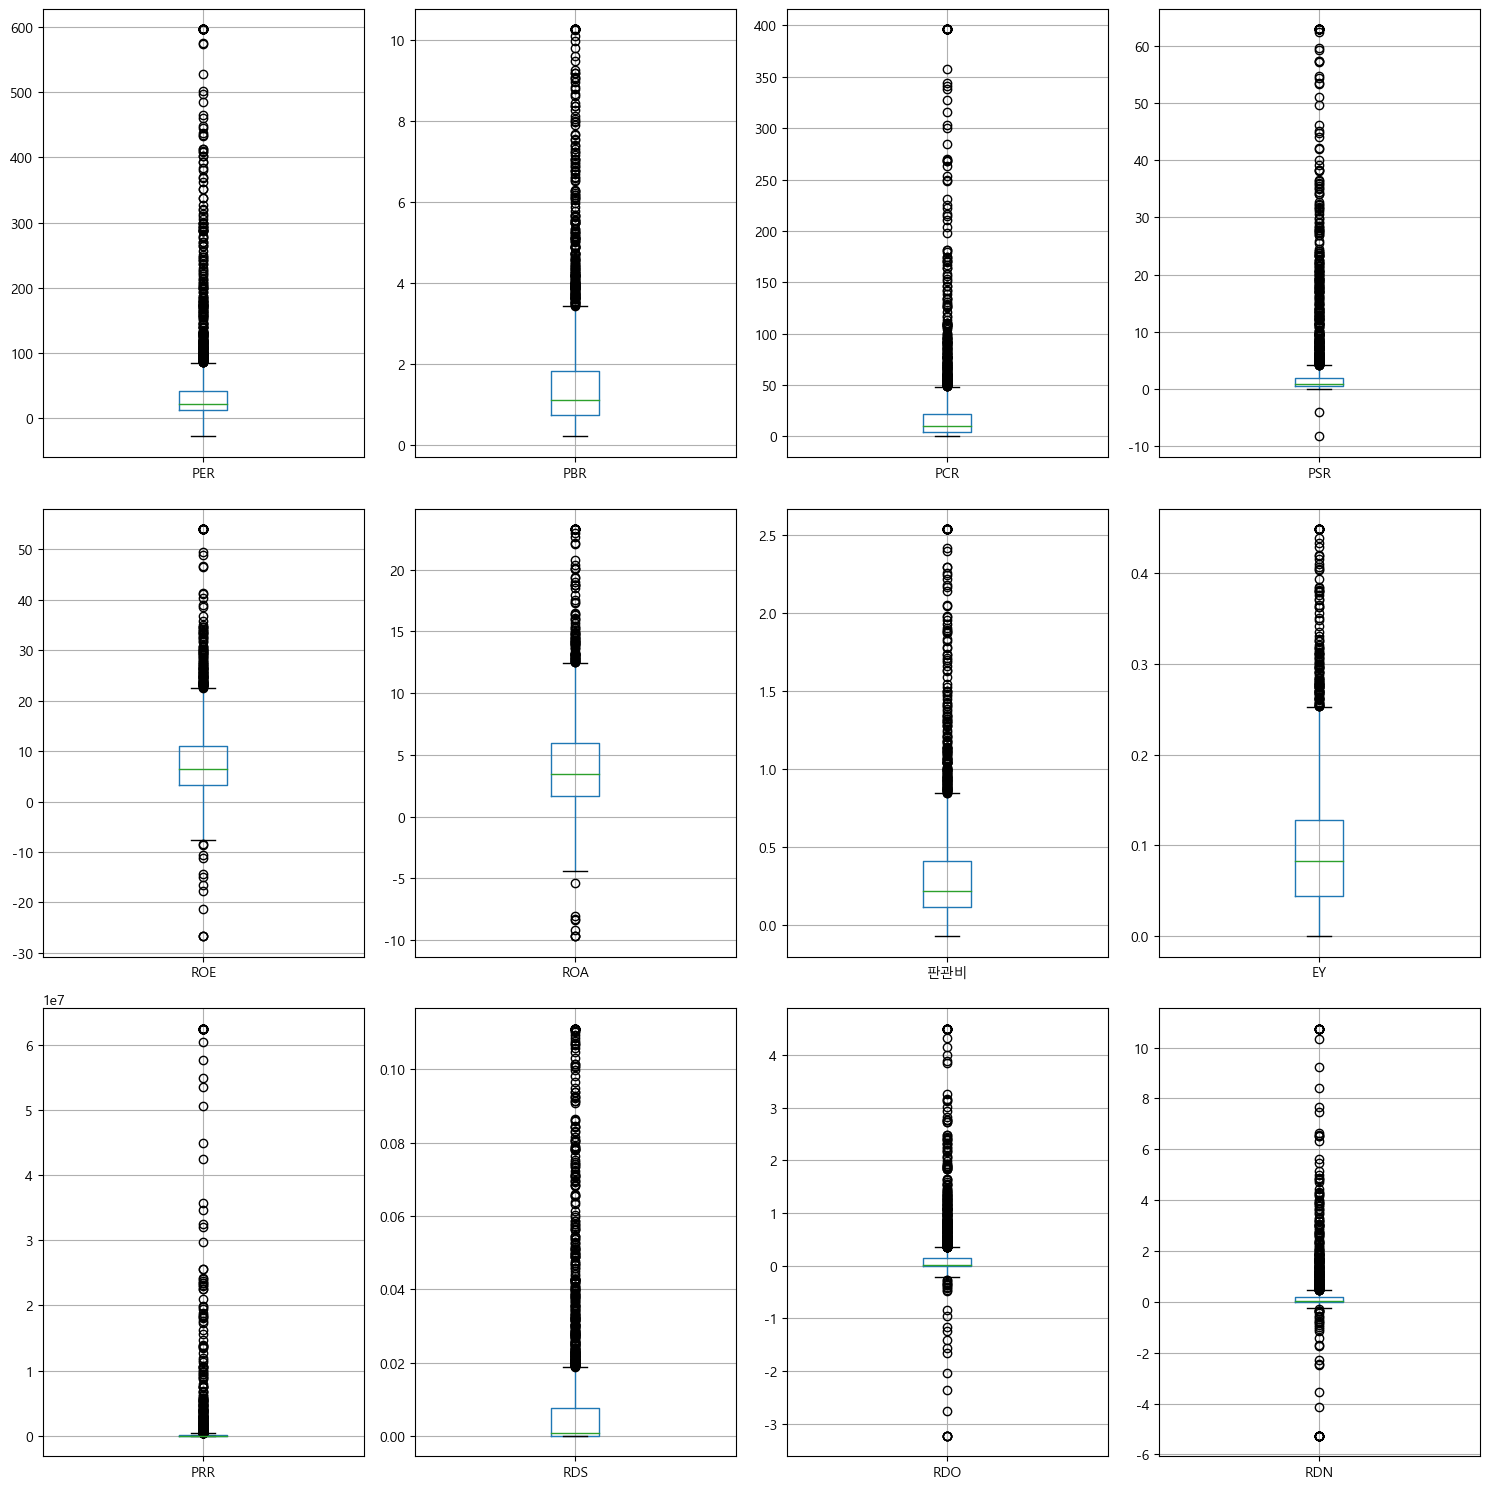

In [1353]:
## 윈저라이징 후 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY",'PRR', 'RDS', 'RDO', 'RDN']].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

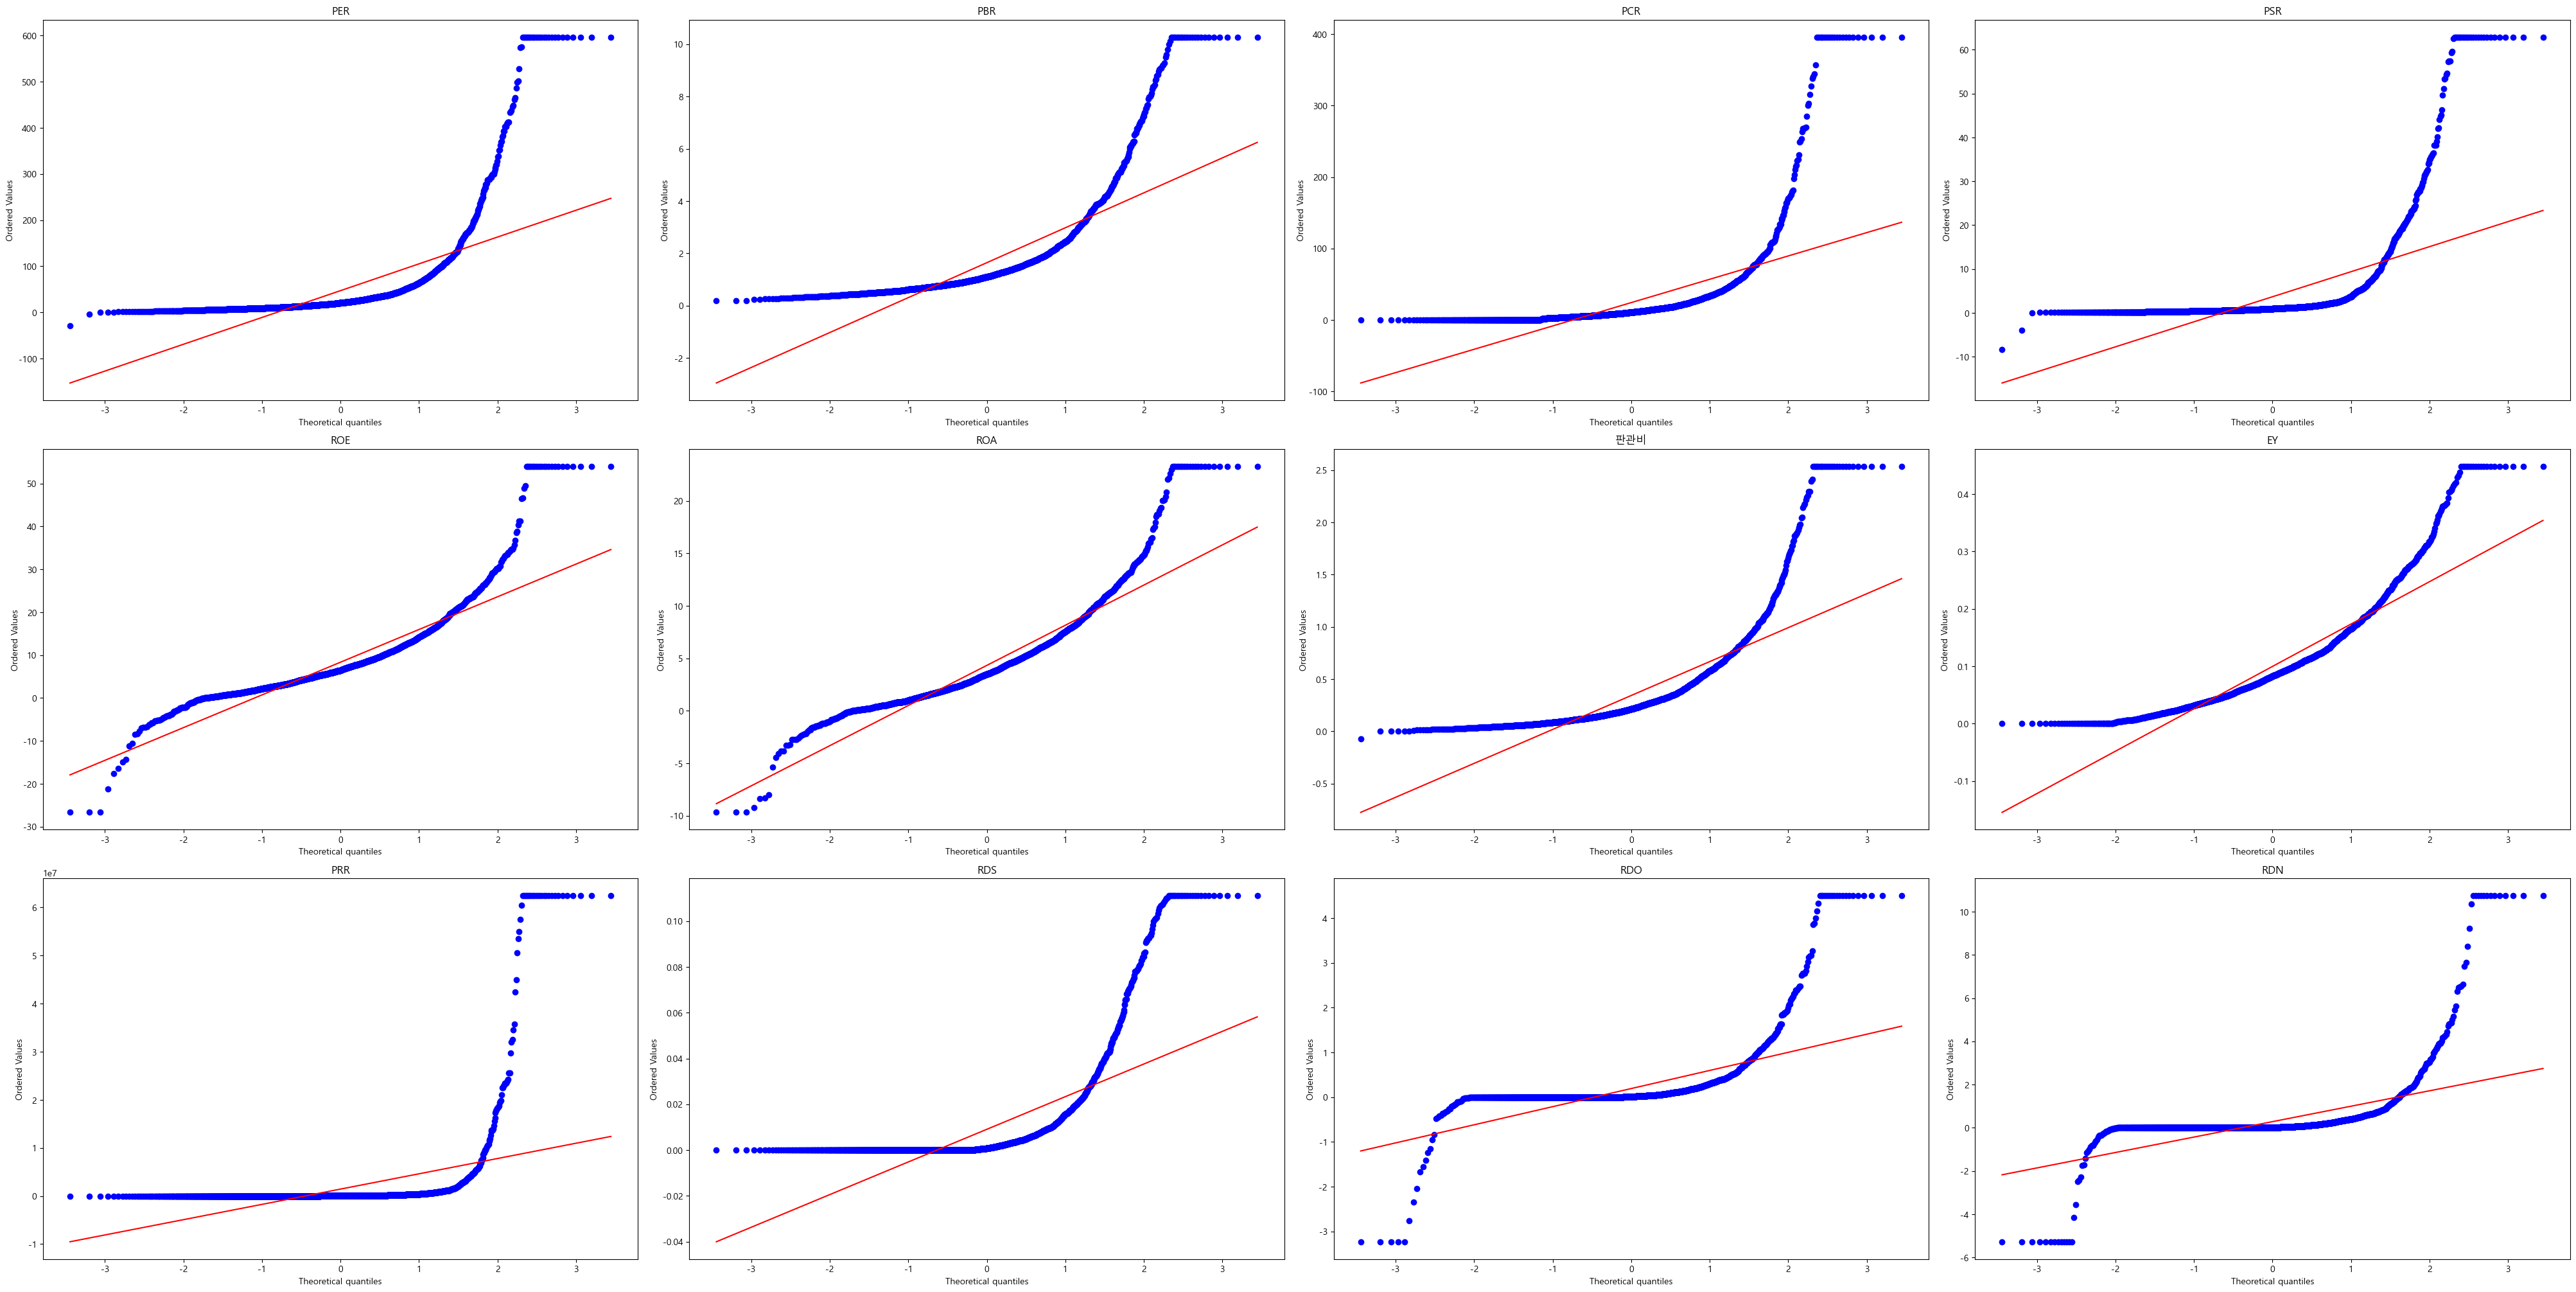

In [1354]:
# 윈저라이징 후 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']],4,3)

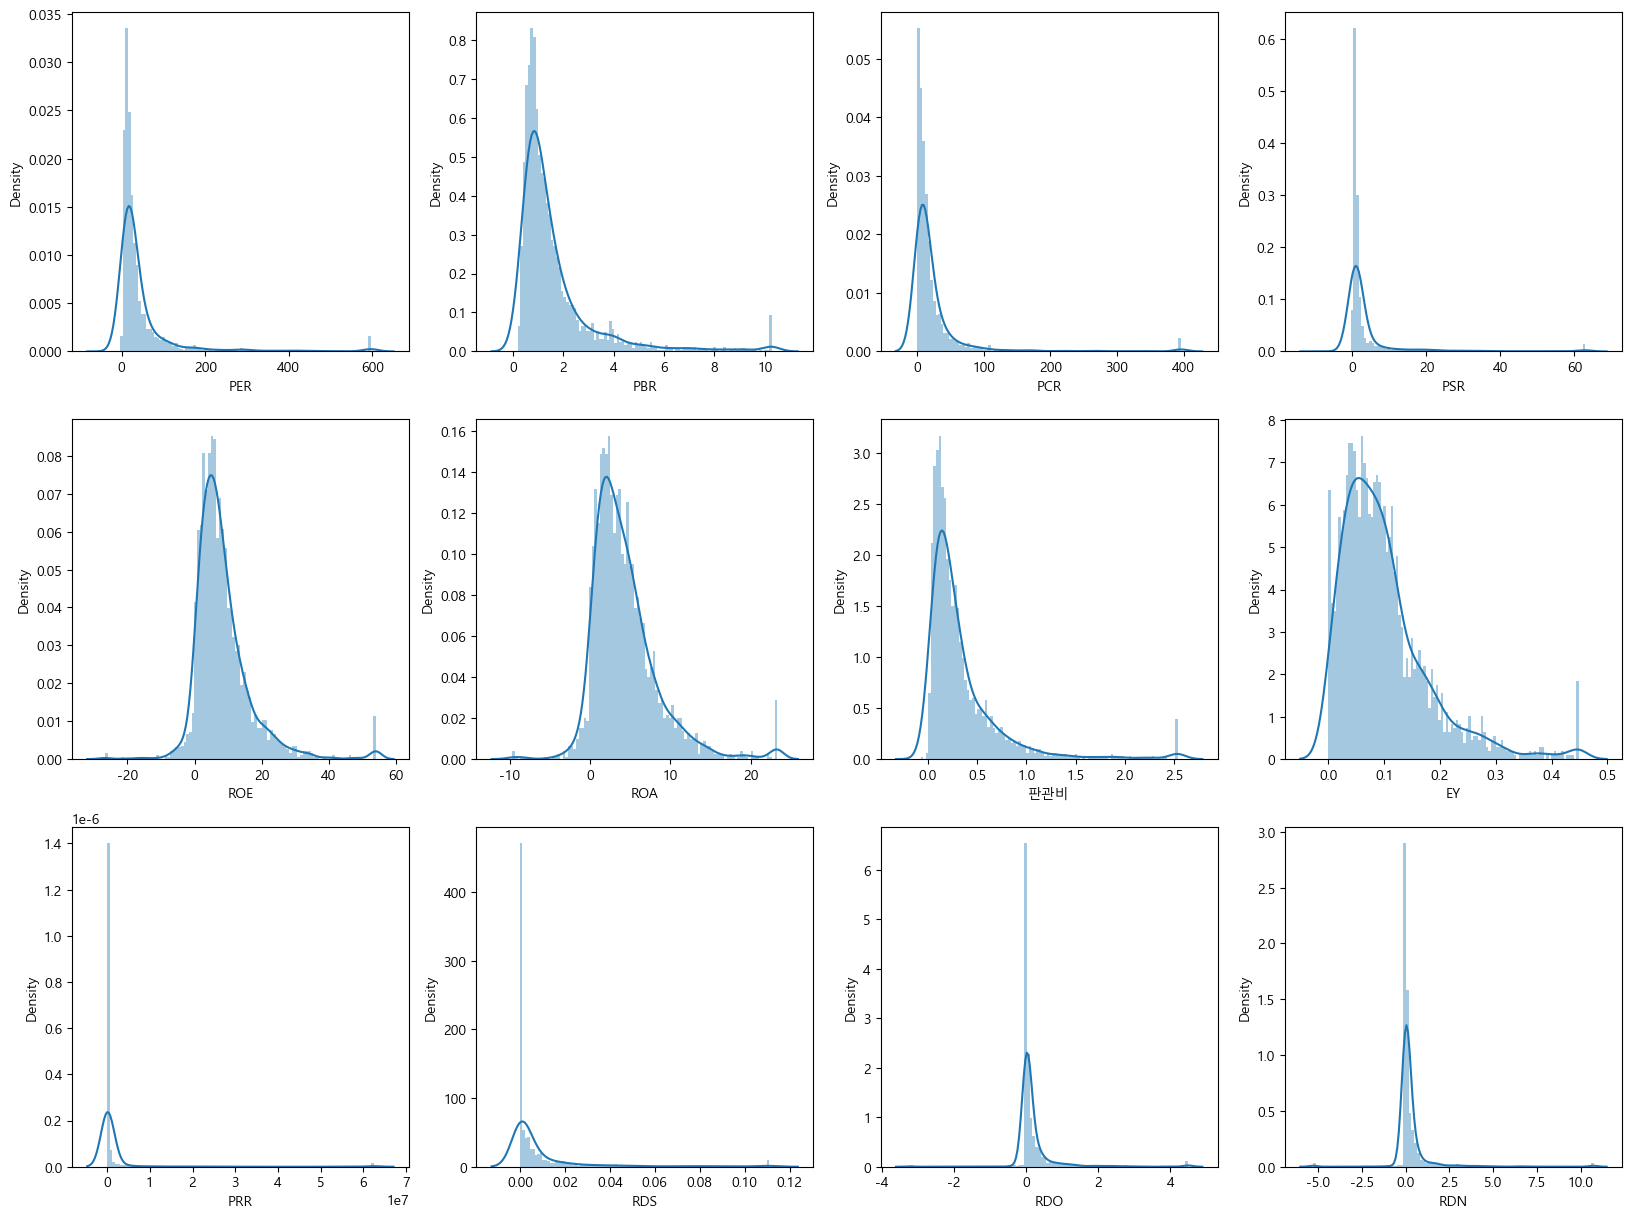

In [1355]:
# 윈저라이징 후 distplot

col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

In [1356]:
kospi_col = kospi[['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN']].columns

In [1357]:
kospi_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN'],
      dtype='object')

In [1358]:
kospi[kospi_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2425 entries, 0 to 3190
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER     2425 non-null   float64
 1   PBR     2425 non-null   float64
 2   PCR     2425 non-null   float64
 3   PSR     2425 non-null   float64
 4   ROE     2425 non-null   float64
 5   ROA     2425 non-null   float64
 6   판관비     2425 non-null   float64
 7   EY      2425 non-null   float64
 8   PRR     2425 non-null   float64
 9   RDS     2425 non-null   float64
 10  RDO     2425 non-null   float64
 11  RDN     2425 non-null   float64
dtypes: float64(12)
memory usage: 246.3 KB


In [1359]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standard 스케일링
scaler = StandardScaler()
kospi[kospi_col] = scaler.fit_transform(kospi[kospi_col])

print(kospi.head())

     회사명    종목코드  회계년도       종가       ROE          시가총액       PER       PBR   
0  DB하이텍  000990  2015  14300.0  5.437286  6.344600e+11 -0.503642  0.308228  \
1  DB하이텍  000990  2016  15900.0  2.538876  7.054485e+11 -0.454818  0.305191   
2  DB하이텍  000990  2017  12000.0  2.297144  5.324140e+11 -0.429730  0.162445   
3  DB하이텍  000990  2018  10850.0  1.046802  4.817247e+11 -0.467156 -0.171643   
4  DB하이텍  000990  2019  27600.0  1.080145  1.225401e+12 -0.468037 -0.132160   

        PCR       PSR       PRR       RDS       RDO       RDN       ROA   
0 -0.411431 -0.314613 -0.192361  3.244873  0.330400  0.090110  2.090957  \
1 -0.422068 -0.297698 -0.192323  3.014843  0.194140  0.275659  1.131931   
2 -0.396222 -0.275874 -0.192775  3.541968  0.305571  0.178596  1.653721   
3 -0.405964 -0.288423 -0.192865  3.483784  0.447668  0.275597  0.933320   
4 -0.373756 -0.283512 -0.191101  2.963903  0.183322  0.207852  1.292695   

        판관비        EY     수정종가        수익률  
0 -0.446007  1.207491   5880.0

In [1360]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2015,14300.0,5.437286,6.344600e+11,-0.503642,0.308228,-0.411431,-0.314613,-0.192361,3.244873,0.330400,0.090110,2.090957,-0.446007,1.207491,5880.0,-1.144578
1,DB하이텍,000990,2016,15900.0,2.538876,7.054485e+11,-0.454818,0.305191,-0.422068,-0.297698,-0.192323,3.014843,0.194140,0.275659,1.131931,-0.441884,1.844730,18100.0,20.782313
2,DB하이텍,000990,2017,12000.0,2.297144,5.324140e+11,-0.429730,0.162445,-0.396222,-0.275874,-0.192775,3.541968,0.305571,0.178596,1.653721,-0.339667,2.137299,20350.0,1.243094
3,DB하이텍,000990,2018,10850.0,1.046802,4.817247e+11,-0.467156,-0.171643,-0.405964,-0.288423,-0.192865,3.483784,0.447668,0.275597,0.933320,-0.326718,2.119102,14150.0,-3.046683
4,DB하이텍,000990,2019,27600.0,1.080145,1.225401e+12,-0.468037,-0.132160,-0.373756,-0.283512,-0.191101,2.963903,0.183322,0.207852,1.292695,-0.629576,1.092566,13000.0,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,효성아이티엑스,094280,2016,11700.0,0.689562,1.352309e+11,-0.248473,1.328714,-0.209235,-0.346259,-0.143420,-0.399849,-0.261209,-0.199169,0.405870,-0.557479,-0.035258,13450.0,-1.514196
3187,효성아이티엑스,094280,2017,12600.0,0.970591,1.456333e+11,-0.300001,1.395531,0.379857,-0.346805,-0.180736,-0.266549,-0.116735,-0.109513,0.520764,-0.515178,-0.069789,13050.0,-0.297398
3188,효성아이티엑스,094280,2018,10400.0,0.633594,1.202053e+11,-0.334548,1.772139,-0.340951,-0.358263,-0.186778,-0.177152,0.005766,0.009744,0.457544,-0.374348,0.313450,12600.0,-0.344828
3189,효성아이티엑스,094280,2019,16700.0,1.600525,1.930219e+11,-0.402115,1.529166,-0.295323,-0.353898,-0.183567,-0.134131,-0.003346,-0.046546,0.604226,-0.540152,0.321319,10600.0,-1.587302


In [1361]:
kospi.reset_index(drop=True)

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2015,14300.0,5.437286,6.344600e+11,-0.503642,0.308228,-0.411431,-0.314613,-0.192361,3.244873,0.330400,0.090110,2.090957,-0.446007,1.207491,5880.0,-1.144578
1,DB하이텍,000990,2016,15900.0,2.538876,7.054485e+11,-0.454818,0.305191,-0.422068,-0.297698,-0.192323,3.014843,0.194140,0.275659,1.131931,-0.441884,1.844730,18100.0,20.782313
2,DB하이텍,000990,2017,12000.0,2.297144,5.324140e+11,-0.429730,0.162445,-0.396222,-0.275874,-0.192775,3.541968,0.305571,0.178596,1.653721,-0.339667,2.137299,20350.0,1.243094
3,DB하이텍,000990,2018,10850.0,1.046802,4.817247e+11,-0.467156,-0.171643,-0.405964,-0.288423,-0.192865,3.483784,0.447668,0.275597,0.933320,-0.326718,2.119102,14150.0,-3.046683
4,DB하이텍,000990,2019,27600.0,1.080145,1.225401e+12,-0.468037,-0.132160,-0.373756,-0.283512,-0.191101,2.963903,0.183322,0.207852,1.292695,-0.629576,1.092566,13000.0,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,효성아이티엑스,094280,2016,11700.0,0.689562,1.352309e+11,-0.248473,1.328714,-0.209235,-0.346259,-0.143420,-0.399849,-0.261209,-0.199169,0.405870,-0.557479,-0.035258,13450.0,-1.514196
2421,효성아이티엑스,094280,2017,12600.0,0.970591,1.456333e+11,-0.300001,1.395531,0.379857,-0.346805,-0.180736,-0.266549,-0.116735,-0.109513,0.520764,-0.515178,-0.069789,13050.0,-0.297398
2422,효성아이티엑스,094280,2018,10400.0,0.633594,1.202053e+11,-0.334548,1.772139,-0.340951,-0.358263,-0.186778,-0.177152,0.005766,0.009744,0.457544,-0.374348,0.313450,12600.0,-0.344828
2423,효성아이티엑스,094280,2019,16700.0,1.600525,1.930219e+11,-0.402115,1.529166,-0.295323,-0.353898,-0.183567,-0.134131,-0.003346,-0.046546,0.604226,-0.540152,0.321319,10600.0,-1.587302


In [1362]:
len(kospi["회사명"].unique())

649

In [1363]:
kospi.to_csv('./kospi.csv', index=False)

In [1364]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2425 entries, 0 to 3190
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     2425 non-null   object 
 1   종목코드    2425 non-null   object 
 2   회계년도    2425 non-null   int32  
 3   종가      2425 non-null   float64
 4   ROE     2425 non-null   float64
 5   시가총액    2425 non-null   float64
 6   PER     2425 non-null   float64
 7   PBR     2425 non-null   float64
 8   PCR     2425 non-null   float64
 9   PSR     2425 non-null   float64
 10  PRR     2425 non-null   float64
 11  RDS     2425 non-null   float64
 12  RDO     2425 non-null   float64
 13  RDN     2425 non-null   float64
 14  ROA     2425 non-null   float64
 15  판관비     2425 non-null   float64
 16  EY      2425 non-null   float64
 17  수정종가    2425 non-null   float64
 18  수익률     2425 non-null   float64
dtypes: float64(16), int32(1), object(2)
memory usage: 369.4+ KB


In [1398]:
kospi[["회계년도", 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN', "수익률"]].columns

Index(['회계년도', 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR',
       'RDS', 'RDO', 'RDN', '수익률'],
      dtype='object')

In [1399]:
kospi_col_ml = kospi[["회계년도", 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN', "수익률"]].columns
kospi_ml = kospi[kospi_col_ml]
kospi_ml

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2015,-0.503642,0.308228,-0.411431,-0.314613,5.437286,2.090957,-0.446007,1.207491,-0.192361,3.244873,0.330400,0.090110,-1.144578
1,2016,-0.454818,0.305191,-0.422068,-0.297698,2.538876,1.131931,-0.441884,1.844730,-0.192323,3.014843,0.194140,0.275659,20.782313
2,2017,-0.429730,0.162445,-0.396222,-0.275874,2.297144,1.653721,-0.339667,2.137299,-0.192775,3.541968,0.305571,0.178596,1.243094
3,2018,-0.467156,-0.171643,-0.405964,-0.288423,1.046802,0.933320,-0.326718,2.119102,-0.192865,3.483784,0.447668,0.275597,-3.046683
4,2019,-0.468037,-0.132160,-0.373756,-0.283512,1.080145,1.292695,-0.629576,1.092566,-0.191101,2.963903,0.183322,0.207852,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2016,-0.248473,1.328714,-0.209235,-0.346259,0.689562,0.405870,-0.557479,-0.035258,-0.143420,-0.399849,-0.261209,-0.199169,-1.514196
3187,2017,-0.300001,1.395531,0.379857,-0.346805,0.970591,0.520764,-0.515178,-0.069789,-0.180736,-0.266549,-0.116735,-0.109513,-0.297398
3188,2018,-0.334548,1.772139,-0.340951,-0.358263,0.633594,0.457544,-0.374348,0.313450,-0.186778,-0.177152,0.005766,0.009744,-0.344828
3189,2019,-0.402115,1.529166,-0.295323,-0.353898,1.600525,0.604226,-0.540152,0.321319,-0.183567,-0.134131,-0.003346,-0.046546,-1.587302


In [1366]:
train = kospi_ml[kospi_ml["회계년도"] < 2018]
test = kospi_ml[kospi_ml["회계년도"] == 2019]

In [1367]:
train

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2015,-0.503642,0.308228,-0.411431,-0.314613,5.437286,2.090957,-0.446007,1.207491,-0.192361,3.244873,0.330400,0.090110,-1.144578
1,2016,-0.454818,0.305191,-0.422068,-0.297698,2.538876,1.131931,-0.441884,1.844730,-0.192323,3.014843,0.194140,0.275659,20.782313
2,2017,-0.429730,0.162445,-0.396222,-0.275874,2.297144,1.653721,-0.339667,2.137299,-0.192775,3.541968,0.305571,0.178596,1.243094
10,2015,-0.418096,-0.028896,-0.349401,-0.209308,0.682417,1.350775,-0.749555,0.665790,-0.194099,-0.452766,-0.313270,-0.241034,9.451074
11,2016,-0.470035,-0.432838,-0.388568,-0.273691,0.605015,1.696402,-0.729154,1.377600,-0.194099,-0.452766,-0.313270,-0.241034,-0.625767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,2017,-0.395476,-0.071416,-0.174343,-0.133466,0.404960,1.360528,-0.562167,-0.181265,-0.146122,-0.059238,-0.249187,-0.204550,-0.030675
3185,2015,-0.110460,2.182155,-0.075134,-0.320615,0.974163,0.451172,-0.651220,-0.316873,-0.146981,-0.374633,-0.240951,-0.184400,-2.729358
3186,2016,-0.248473,1.328714,-0.209235,-0.346259,0.689562,0.405870,-0.557479,-0.035258,-0.143420,-0.399849,-0.261209,-0.199169,-1.514196
3187,2017,-0.300001,1.395531,0.379857,-0.346805,0.970591,0.520764,-0.515178,-0.069789,-0.180736,-0.266549,-0.116735,-0.109513,-0.297398


In [1368]:
# X_train_col = train.drop(["회계년도", "수익률"], axis = 1).columns
# X_test_col = test.drop(["회계년도", "수익률"], axis = 1).columns

In [1369]:
# test["수익률"]
# train["수익률"]

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train = train[X_train_col]
# X_test = test[X_test_col]


# y_train = train[["수익률"]]
# y_test = test[["수익률"]]


# # 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
# rf = RandomForestRegressor(random_state=0)
# rf.fit(X_train, y_train)
# pred = rf.predict(X_test)
# print(pred)
# # accuracy = accuracy_score(y_test, pred)
# # print("랜덤 포레스트 정확도 : {0: .4f}".format(accuracy))

In [1385]:
# 전체 피쳐 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml.drop(["회계년도", "수익률"], axis = 1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-21.578 -80.642 -36.673 -18.71  -36.279]
 5 folds 의 개별 RMSE score :  [4.645 8.98  6.056 4.325 6.023]
 5 folds 의 개별 평균 RMSE : 6.006


<Axes: >

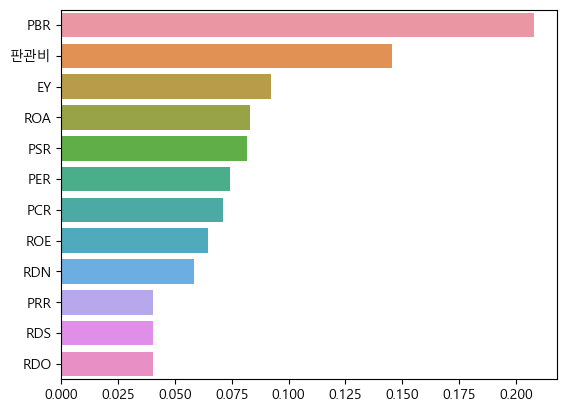

In [1386]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1389]:
# 밸류팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["PER", "PBR", "PSR", "PCR", "EY"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-28.499 -84.673 -36.001 -18.963 -46.444]
 5 folds 의 개별 RMSE score :  [5.338 9.202 6.    4.355 6.815]
 5 folds 의 개별 평균 RMSE : 6.342


<Axes: >

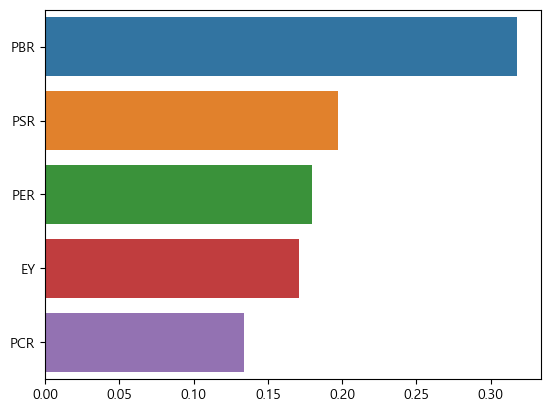

In [1390]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1391]:
# RND 팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["PRR", "RDS", "RDO", "RDN"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-21.135 -80.425 -36.311 -48.256 -45.785]
 5 folds 의 개별 RMSE score :  [4.597 8.968 6.026 6.947 6.766]
 5 folds 의 개별 평균 RMSE : 6.661


<Axes: >

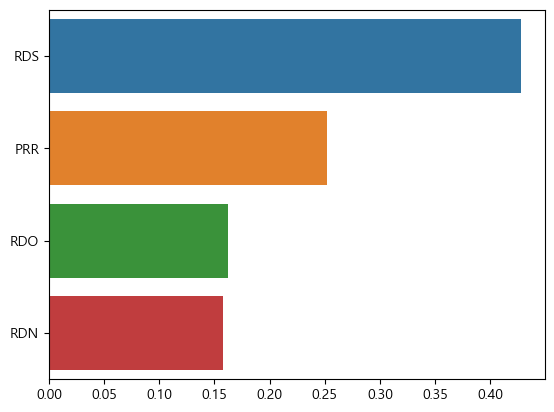

In [1392]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1393]:
# 퀄리티 팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["ROE", "ROA", "판관비"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-23.299 -82.354 -41.546 -21.395 -29.972]
 5 folds 의 개별 RMSE score :  [4.827 9.075 6.446 4.625 5.475]
 5 folds 의 개별 평균 RMSE : 6.090


<Axes: >

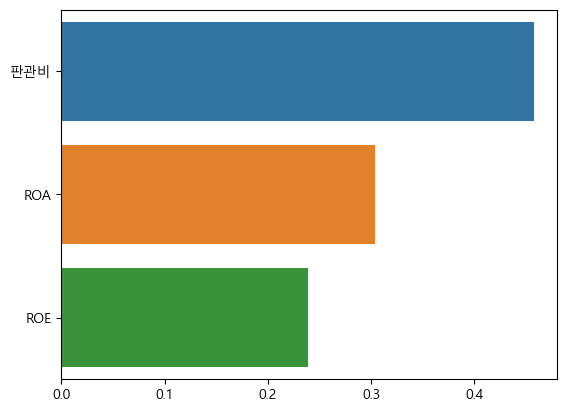

In [1394]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1400]:
kospi_ml

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2015,-0.503642,0.308228,-0.411431,-0.314613,5.437286,2.090957,-0.446007,1.207491,-0.192361,3.244873,0.330400,0.090110,-1.144578
1,2016,-0.454818,0.305191,-0.422068,-0.297698,2.538876,1.131931,-0.441884,1.844730,-0.192323,3.014843,0.194140,0.275659,20.782313
2,2017,-0.429730,0.162445,-0.396222,-0.275874,2.297144,1.653721,-0.339667,2.137299,-0.192775,3.541968,0.305571,0.178596,1.243094
3,2018,-0.467156,-0.171643,-0.405964,-0.288423,1.046802,0.933320,-0.326718,2.119102,-0.192865,3.483784,0.447668,0.275597,-3.046683
4,2019,-0.468037,-0.132160,-0.373756,-0.283512,1.080145,1.292695,-0.629576,1.092566,-0.191101,2.963903,0.183322,0.207852,-0.812721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2016,-0.248473,1.328714,-0.209235,-0.346259,0.689562,0.405870,-0.557479,-0.035258,-0.143420,-0.399849,-0.261209,-0.199169,-1.514196
3187,2017,-0.300001,1.395531,0.379857,-0.346805,0.970591,0.520764,-0.515178,-0.069789,-0.180736,-0.266549,-0.116735,-0.109513,-0.297398
3188,2018,-0.334548,1.772139,-0.340951,-0.358263,0.633594,0.457544,-0.374348,0.313450,-0.186778,-0.177152,0.005766,0.009744,-0.344828
3189,2019,-0.402115,1.529166,-0.295323,-0.353898,1.600525,0.604226,-0.540152,0.321319,-0.183567,-0.134131,-0.003346,-0.046546,-1.587302


In [1403]:
train = kospi_ml[kospi_ml["회계년도"] < 2018]
test = kospi_ml[kospi_ml["회계년도"] == 2019]

In [1404]:
X_train_col = train.drop(["회계년도", "수익률"], axis = 1).columns
X_test_col = test.drop(["회계년도", "수익률"], axis = 1).columns

In [1405]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = train[X_train_col]
X_test = test[X_test_col]


y_train = train[["수익률"]]
y_test = test[["수익률"]]

model=LinearRegression()
model.fit(X_train,y_train)

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 13.441, RMSE:3.666
Variance score:-0.385
